<a href="https://colab.research.google.com/github/Roja0230/MachineLearning-CodSoft/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,precision_score,recall_score,f1_score,fbeta_score
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
import joblib

In [ ]:
from google.colab import files
import zipfile, os

print("Upload archive.zip now (choose file from your PC)...")
uploaded = files.upload()  # select archive.zip

# assume uploaded file name is archive.zip; if different, change below
zip_name = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_name, 'r') as z:
    z.extractall('/content/data')

# list extracted files/folders
for root, dirs, files in os.walk('/content/data'):
    print(root)
    for f in files:
        print("   ", f)

Upload archive.zip now (choose file from your PC)...


Saving archive.zip to archive.zip
/content/data
    spam.csv


In [ ]:
df = pd.read_csv("/content/data/spam.csv", encoding="latin-1")

In [ ]:
# Keep only the needed columns (label + message)
df = df.rename(columns={"v1": "label", "v2": "message"})
df = df[['label','message']]

In [ ]:
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# 4. Encode labels (ham = 0, spam = 1)
df['label'] = df['label'].map({'ham':0, 'spam':1})

print("Class distribution:\n", df['label'].value_counts())

Class distribution:
 label
0    4825
1     747
Name: count, dtype: int64


In [ ]:
# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

In [ ]:
# 6. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:

print("TF-IDF shape:", X_train_tfidf.shape)

TF-IDF shape: (4457, 5000)



Naive Bayes Results:
Accuracy: 0.9721973094170404
Precision: 0.9916666666666667
Recall: 0.7986577181208053
F1 Score: 0.8847583643122676

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.80      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



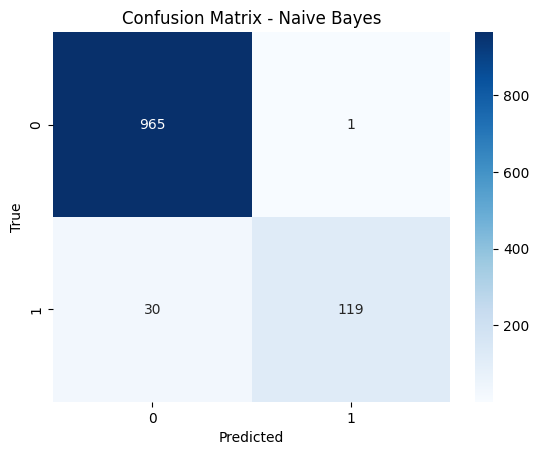


Logistic Regression Results:
Accuracy: 0.9704035874439462
Precision: 1.0
Recall: 0.7785234899328859
F1 Score: 0.8754716981132076

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



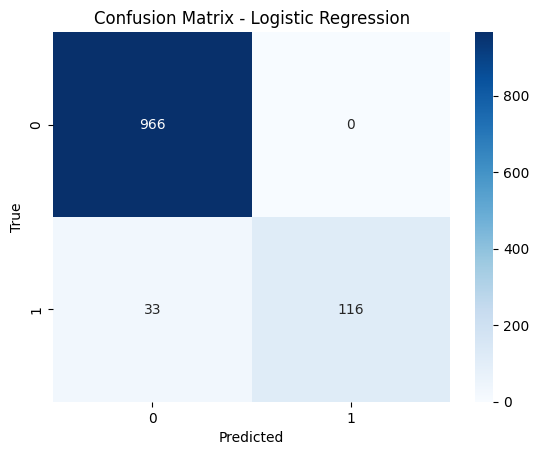


SVM Results:
Accuracy: 0.9847533632286996
Precision: 0.9925373134328358
Recall: 0.8926174496644296
F1 Score: 0.9399293286219081

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



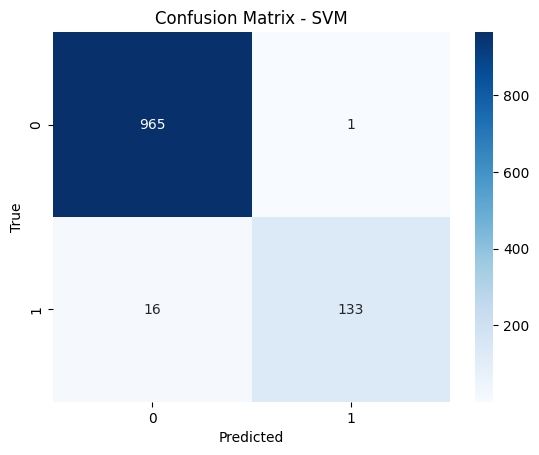

In [ ]:
# 7. Train multiple models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, acc, prec, rec, f1])

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [ ]:
# 8. Compare models
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print("\nModel Comparison:\n", results_df)


Model Comparison:
                  Model  Accuracy  Precision    Recall        F1
0          Naive Bayes  0.972197   0.991667  0.798658  0.884758
1  Logistic Regression  0.970404   1.000000  0.778523  0.875472
2                  SVM  0.984753   0.992537  0.892617  0.939929


In [ ]:
# 9. Save best model (example: Logistic Regression)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
joblib.dump((best_model, tfidf), "spam_sms_model.pkl")
print("✅ Model saved as spam_sms_model.pkl")

✅ Model saved as spam_sms_model.pkl


In [ ]:
# Load the saved model
loaded_model, loaded_tfidf = joblib.load("spam_sms_model.pkl")

# Make predictions using the loaded model and the transformed test data
lr_predictions = loaded_model.predict(X_test_tfidf)

# You can now use lr_predictions for further analysis or evaluation
print(lr_predictions)

[0 0 0 ... 0 0 0]


In [ ]:
lr_predictions=loaded_model.predict(X_test_tfidf)

In [ ]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Precision:", precision_score(y_test, lr_predictions))
print("Recall:", recall_score(y_test, lr_predictions))
print("F1 Score:", f1_score(y_test, lr_predictions))

Logistic Regression Model:
[[966   0]
 [ 33 116]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.78      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.9704035874439462
Precision: 1.0
Recall: 0.7785234899328859
F1 Score: 0.8754716981132076
